In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load csv files that starts with the argument
def load_csv_by_name(path, name):
    # load csv file that starts with the argument
    # return the element in the path that has name in path
    data = [pd.read_csv(file) for file in path if name in file]
    return data[0]

# get the file path of csv files in data folder
def get_csv_path():
    path = './data'
    files = os.listdir(path)
    csv_files = [os.path.join(path, file) for file in files if file.endswith('.csv')]
    return csv_files

def get_data_by_column(data, model_name):
    data['Step']
    column_names = data.keys()

    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]

    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    data[column_names[0]]

    data
    return 0

# list of model name
model_names = ['melting_softmax', 'melting_self', 'feudal','a3c']
model_name = model_names[0]

# get the data using get_csv_path
csv_files = get_csv_path()
data  = load_csv_by_name(csv_files, model_name+'_reward')

column_names = data.keys()
# list of columns that include model_name
column_names = [column for column in column_names if model_name in column]
# list of columns that does not ends with min max
column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

steps = np.array(data['Step'])
smoothing_length = 100
dataset = []
for i in range(len(column_names)):
    datapoints = np.array(data[column_names[i]])
    # interpolate nan in datapoints
    datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
    # datapoints smoothing running average
    datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')
    
    dataset.append(datapoints)
dataset = np.array(dataset)


In [17]:
steps.shape

(50181,)

In [18]:
dataset.shape

(5, 50181)

In [31]:
datapoints

array([1409.73137188, 1423.67137188, 1437.38137188, ..., 2335.57300578,
       2290.60300578, 2246.1511876 ])

(0.0, 30000000.0)

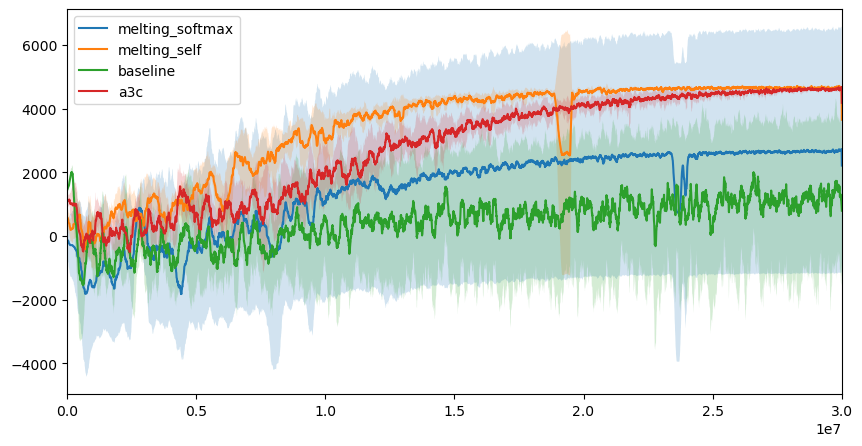

In [53]:
%matplotlib inline


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# list of model name
model_names = ['melting_softmax', 'melting_self', 'baseline','a3c']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path()
    data  = load_csv_by_name(csv_files, model_name+'_reward')

    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 200
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot mean of the line and standard deviation
    p = ax.plot(steps, dataset.mean(axis=0), label=model_names[id])
    # plot shades of standard deviation
    ax.fill_between(steps, dataset.mean(axis=0) - dataset.std(axis=0), dataset.mean(axis=0) + dataset.std(axis=0), alpha=0.2, label='_nolegend_')

    
ax.legend()
ax.set_xlim(0, 30000000)

(0.0, 30000000.0)

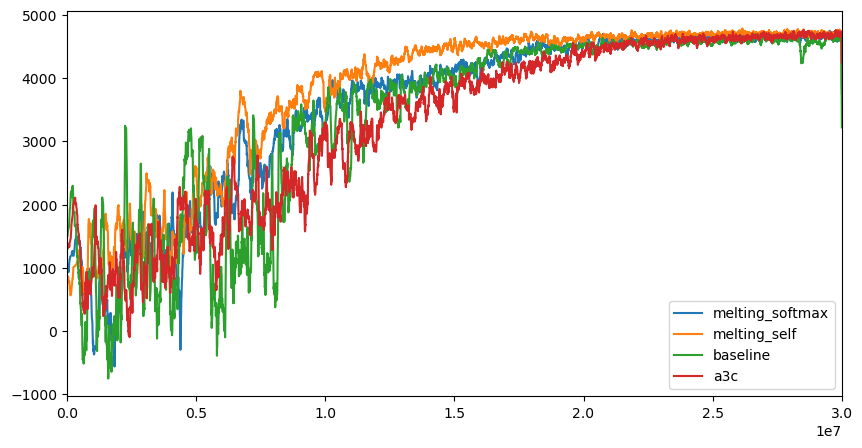

In [54]:


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# list of model name
model_names = ['melting_softmax', 'melting_self', 'baseline','a3c']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path()
    data  = load_csv_by_name(csv_files, model_name+'_reward')

    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 200
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot top 1 percent of each dataset
    p = ax.plot(steps, np.percentile(dataset, 99, axis=0), label=model_names[id])
    # # plot top 5 percent of each dataset
    # p = ax.plot(steps, np.percentile(dataset, 95, axis=0), label=model_names[id])

    # plot shades of standard deviation

# legend model_names for only p not ax.fill_between
ax.legend(model_names)

# set x lim
ax.set_xlim(0, 30000000)

(0.0, 30000000.0)

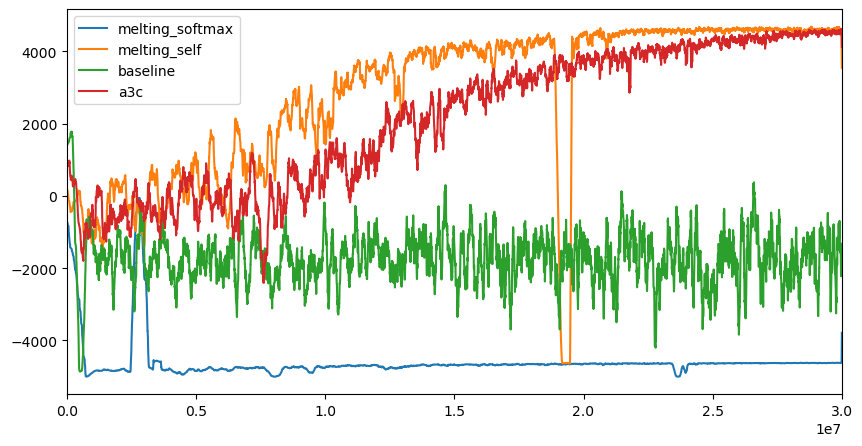

In [56]:


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# list of model name
model_names = ['melting_softmax', 'melting_self', 'baseline','a3c']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path()
    data  = load_csv_by_name(csv_files, model_name+'_reward')

    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 200
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot top 1 percent of each dataset
    p = ax.plot(steps, np.percentile(dataset, 1, axis=0), label=model_names[id])
    # # plot top 5 percent of each dataset
    # p = ax.plot(steps, np.percentile(dataset, 95, axis=0), label=model_names[id])

    # plot shades of standard deviation

# legend model_names for only p not ax.fill_between
ax.legend(model_names)

# set x lim
ax.set_xlim(0, 30000000)

(0.0, 30000000.0)

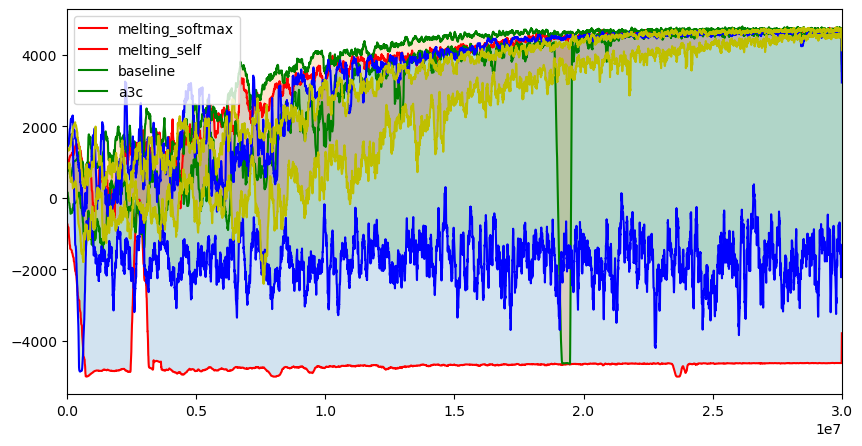

In [60]:


# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# list of model name
model_names = ['melting_softmax', 'melting_self', 'baseline','a3c']
colors = ['r', 'g', 'b', 'y']

for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path()
    data  = load_csv_by_name(csv_files, model_name+'_reward')

    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 200
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot top 1 percent of each dataset
    p = ax.plot(steps, np.percentile(dataset, 99, axis=0), color=colors[id], label=model_names[id])
    # # plot top 5 percent of each dataset
    p = ax.plot(steps, np.percentile(dataset, 1, axis=0), color=colors[id], label=model_names[id])
    
    ax.fill_between(steps,  np.percentile(dataset, 1, axis=0), np.percentile(dataset, 99, axis=0), alpha=0.2, label='_nolegend_')


    # plot shades of standard deviation

# legend model_names for only p not ax.fill_between
ax.legend(model_names)

# set x lim
ax.set_xlim(0, 30000000)

(0.0, 30000000.0)

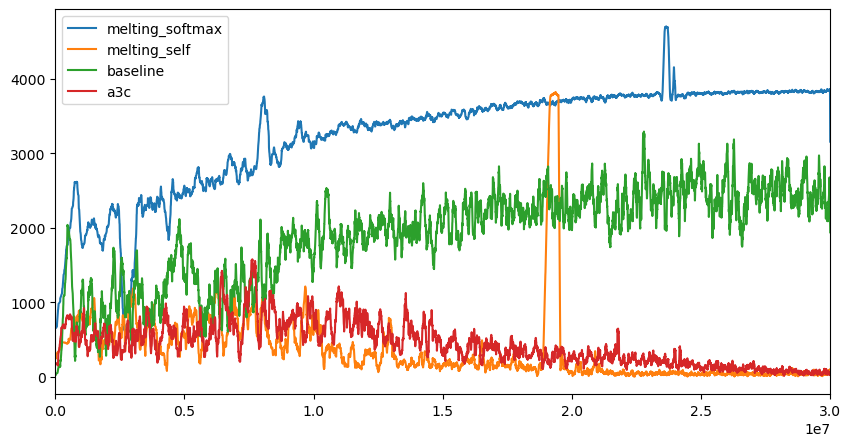

In [55]:

# subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# list of model name
model_names = ['melting_softmax', 'melting_self', 'baseline','a3c']
for id in range(len(model_names)):
    model_name = model_names[id]

    # get the data using get_csv_path
    csv_files = get_csv_path()
    data  = load_csv_by_name(csv_files, model_name+'_reward')

    column_names = data.keys()
    # list of columns that include model_name
    column_names = [column for column in column_names if model_name in column]
    # list of columns that does not ends with min max
    column_names = [column for column in column_names if not column.endswith('MAX') and not column.endswith('MIN')]

    steps = np.array(data['Step'])
    smoothing_length = 200
    dataset = []
    for i in range(len(column_names)):
        datapoints = np.array(data[column_names[i]])
        # interpolate nan in datapoints
        datapoints = np.interp(steps, steps[~np.isnan(datapoints)], datapoints[~np.isnan(datapoints)])
        # datapoints smoothing running average
        datapoints = np.convolve(datapoints, np.ones((smoothing_length,))/smoothing_length, mode='same')

        dataset.append(datapoints)
    dataset = np.array(dataset)
    # plot mean of the line and standard deviation
    p = ax.plot(steps, dataset.std(axis=0), label=model_names[id])
    # plot shades of standard deviation

# legend model_names for only p not ax.fill_between
ax.legend(model_names)

# set x lim
ax.set_xlim(0, 30000000)